In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def data_extraction(name_ofile):
    # Here, data loading will be done through a context manager
    with open(name_ofile, 'r', encoding='utf8') as rf:
        # transform file into string and split along new line
        filelines = rf.read().split("\n")
 
        # new line will be created at tab spaces
        filedata = [line.split("\t") for line in filelines]
 
        # picks the header
        fileheader = filedata[0]
 
        # header gets deleted
        filedata = filedata[1:]
 
    # return header and data
    return fileheader, filedata
 


In [3]:
# load data in from file
headerofnode, data_ofnode = data_extraction("Data\\nodes.tsv")
headerofedge, data_ofedge = data_extraction("Data\\edges.tsv")

In [4]:
Graph = nx.Graph()
 
# graph gets data of node added to it
for nxnode in data_ofnode:
    # sequentially adding id, name, chinese name, and index year
    Graph.add_node(int(nxnode[0]), pname=nxnode[1], chinese_name=nxnode[2], year_inindex=int(nxnode[3]))
 
#  graph gets data of edge added to it
for nxedge in data_ofedge:
    # sequentially adding node 1, node 2, kin, and label
    Graph.add_edge(int(nxedge[0]), int(nxedge[1]), nxkin=nxedge[2], nxlabel=nxedge[3])


In [5]:
degree_centrality = nx.degree_centrality(Graph)
closeness_centrality = nx.closeness_centrality(Graph)
betweenness_centrality = nx.betweenness_centrality(Graph)

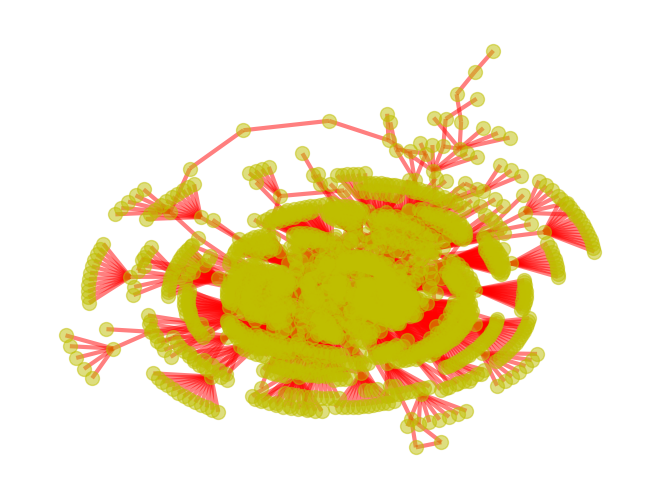

In [6]:
nx.draw_kamada_kawai(Graph, with_labels=False, node_size=100, node_color='y', font_size=5, font_color='b' ,edge_color='r', width=3, alpha=0.5   )
# save the plot as an svg file
#plt.savefig('graph.svg')
#plt.show()


In [7]:
G = Graph

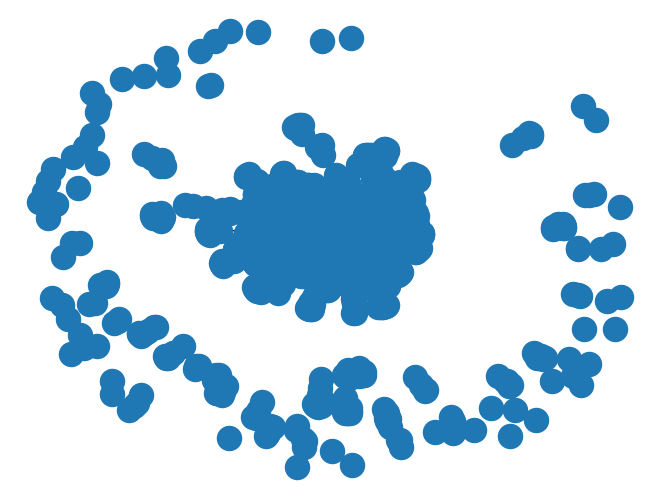

In [8]:

nx.draw(G)  # networkx draw()
plt.draw()  # pyplot draw()

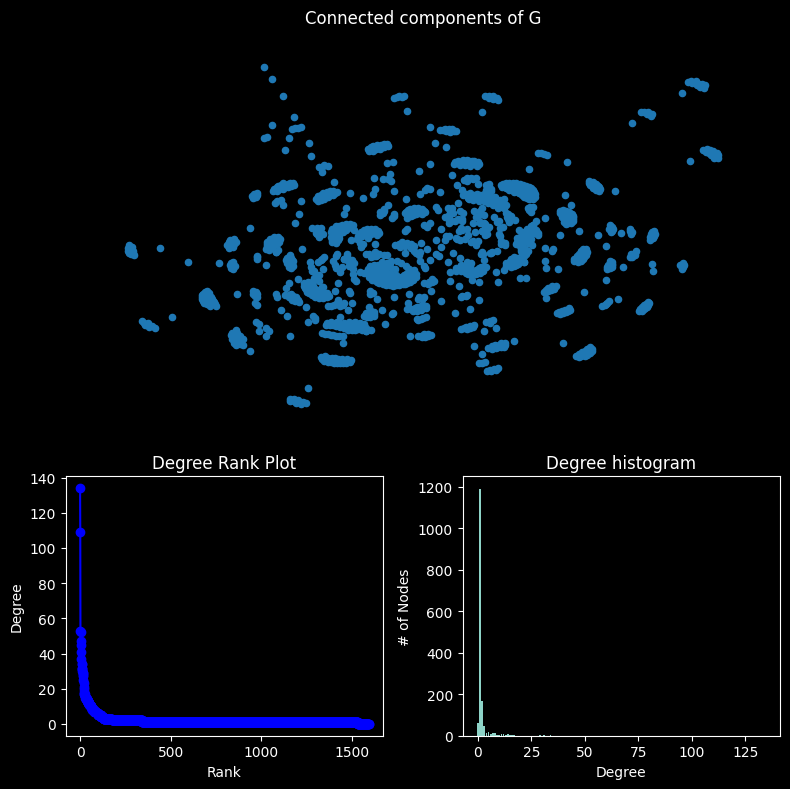

In [9]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [35]:
# identify connected/disconnected nodes
connected = [n for n, d in G.degree() if d > 0]
disconnected = list(set(G.nodes()) - set(connected))
# identify largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

#### draw graph ####
pos = nx.nx_agraph.graphviz_layout(G,  prog='neato')

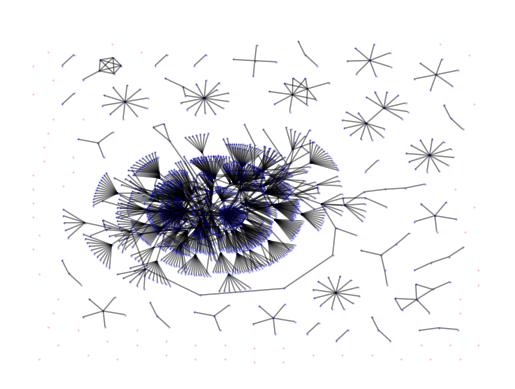

In [38]:
# draw largest connected component of graph
nx.draw_networkx_edges(G0, pos, alpha=0.4, width=.05)
# draw other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.3, width=.001)
nx.draw(G, pos, nodelist=connected, alpha=0.25, node_size=0.5, node_color="blue")
nx.draw(G, pos, nodelist=disconnected, alpha=0.25, node_size=0.25, node_color="red")
plt.show()

In [39]:
import random
GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher

def atlas6():
    """Return the atlas of all connected graphs with at most 6 nodes"""

    Atlas = nx.graph_atlas_g()[3:209]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U

In [40]:
print(G)
print(nx.number_connected_components(G), "connected components")

Graph with 1594 nodes and 1758 edges
93 connected components


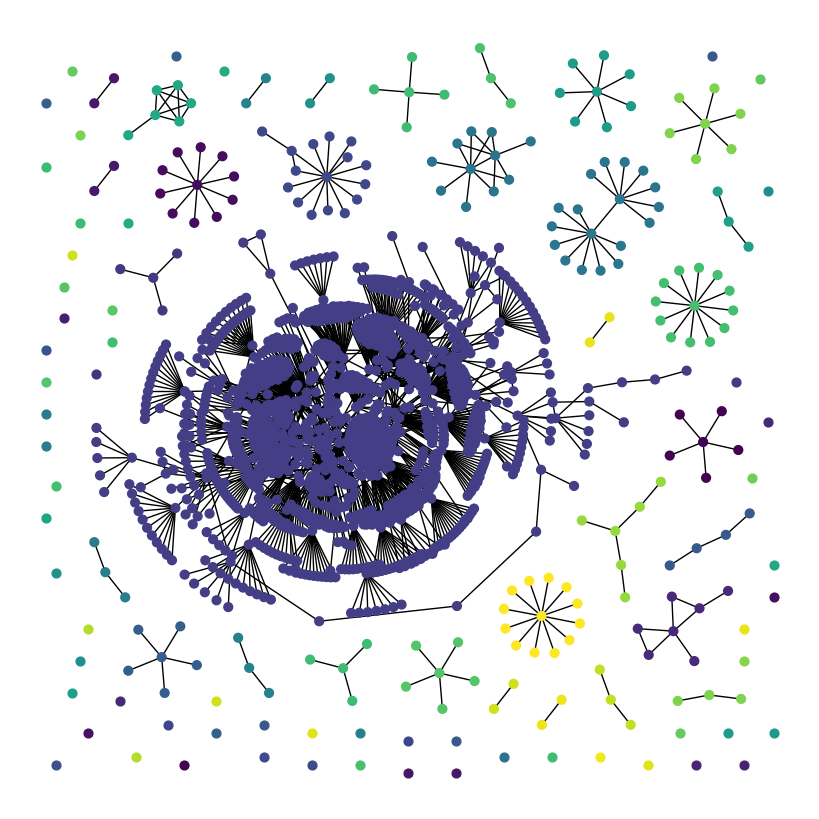

In [41]:
plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()

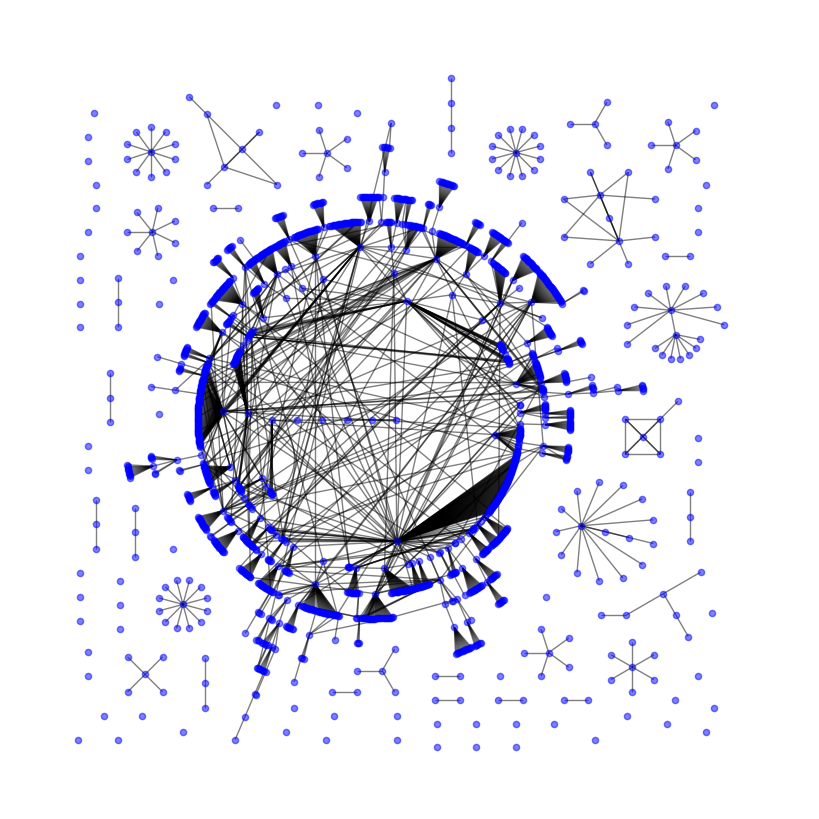

In [42]:
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", args="")
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")

plt.show()

In [54]:
ndegree = {}
for n in G0:
    print(n, G0.degree(n))
    ndegree[n] = G0.degree(n)

10879 6
33843 29
34717 134
34736 1
35003 1
56579 2
65899 1
68364 1
123984 1
124005 1
124967 2
26218 5
26220 1
265376 1
265377 1
28825 53
28826 7
29577 1
30374 7
34166 3
34534 17
34643 3
67905 1
68049 1
68070 2
68132 2
68194 3
68210 1
68238 2
68240 3
68244 1
68280 2
68287 2
68289 1
68292 3
68328 1
68335 2
68352 1
68456 1
68482 2
125411 9
127325 1
127955 1
128223 1
128901 1
129522 1
129727 2
130018 2
130937 1
131001 2
131191 5
131402 2
131495 3
131616 1
132156 2
132342 1
132829 2
132973 1
133063 2
133434 1
133464 1
133675 1
133705 1
275477 1
275478 1
275479 1
275480 1
275481 1
275482 1
275483 1
275484 1
275485 1
275486 1
127606 2
128838 1
130754 1
130832 3
131549 1
133285 2
133485 1
29575 11
29576 1
30284 11
34263 4
34682 6
35127 3
124893 1
126759 1
128488 1
128820 3
129770 1
129902 1
131175 1
29578 5
29579 7
30849 14
34734 3
127541 1
228584 1
228585 1
228589 1
228590 1
228591 1
228592 1
29584 1
56573 2
29589 2
29590 11
29751 28
329275 1
329281 1
329282 1
329283 1
329284 1
329285 1
32928

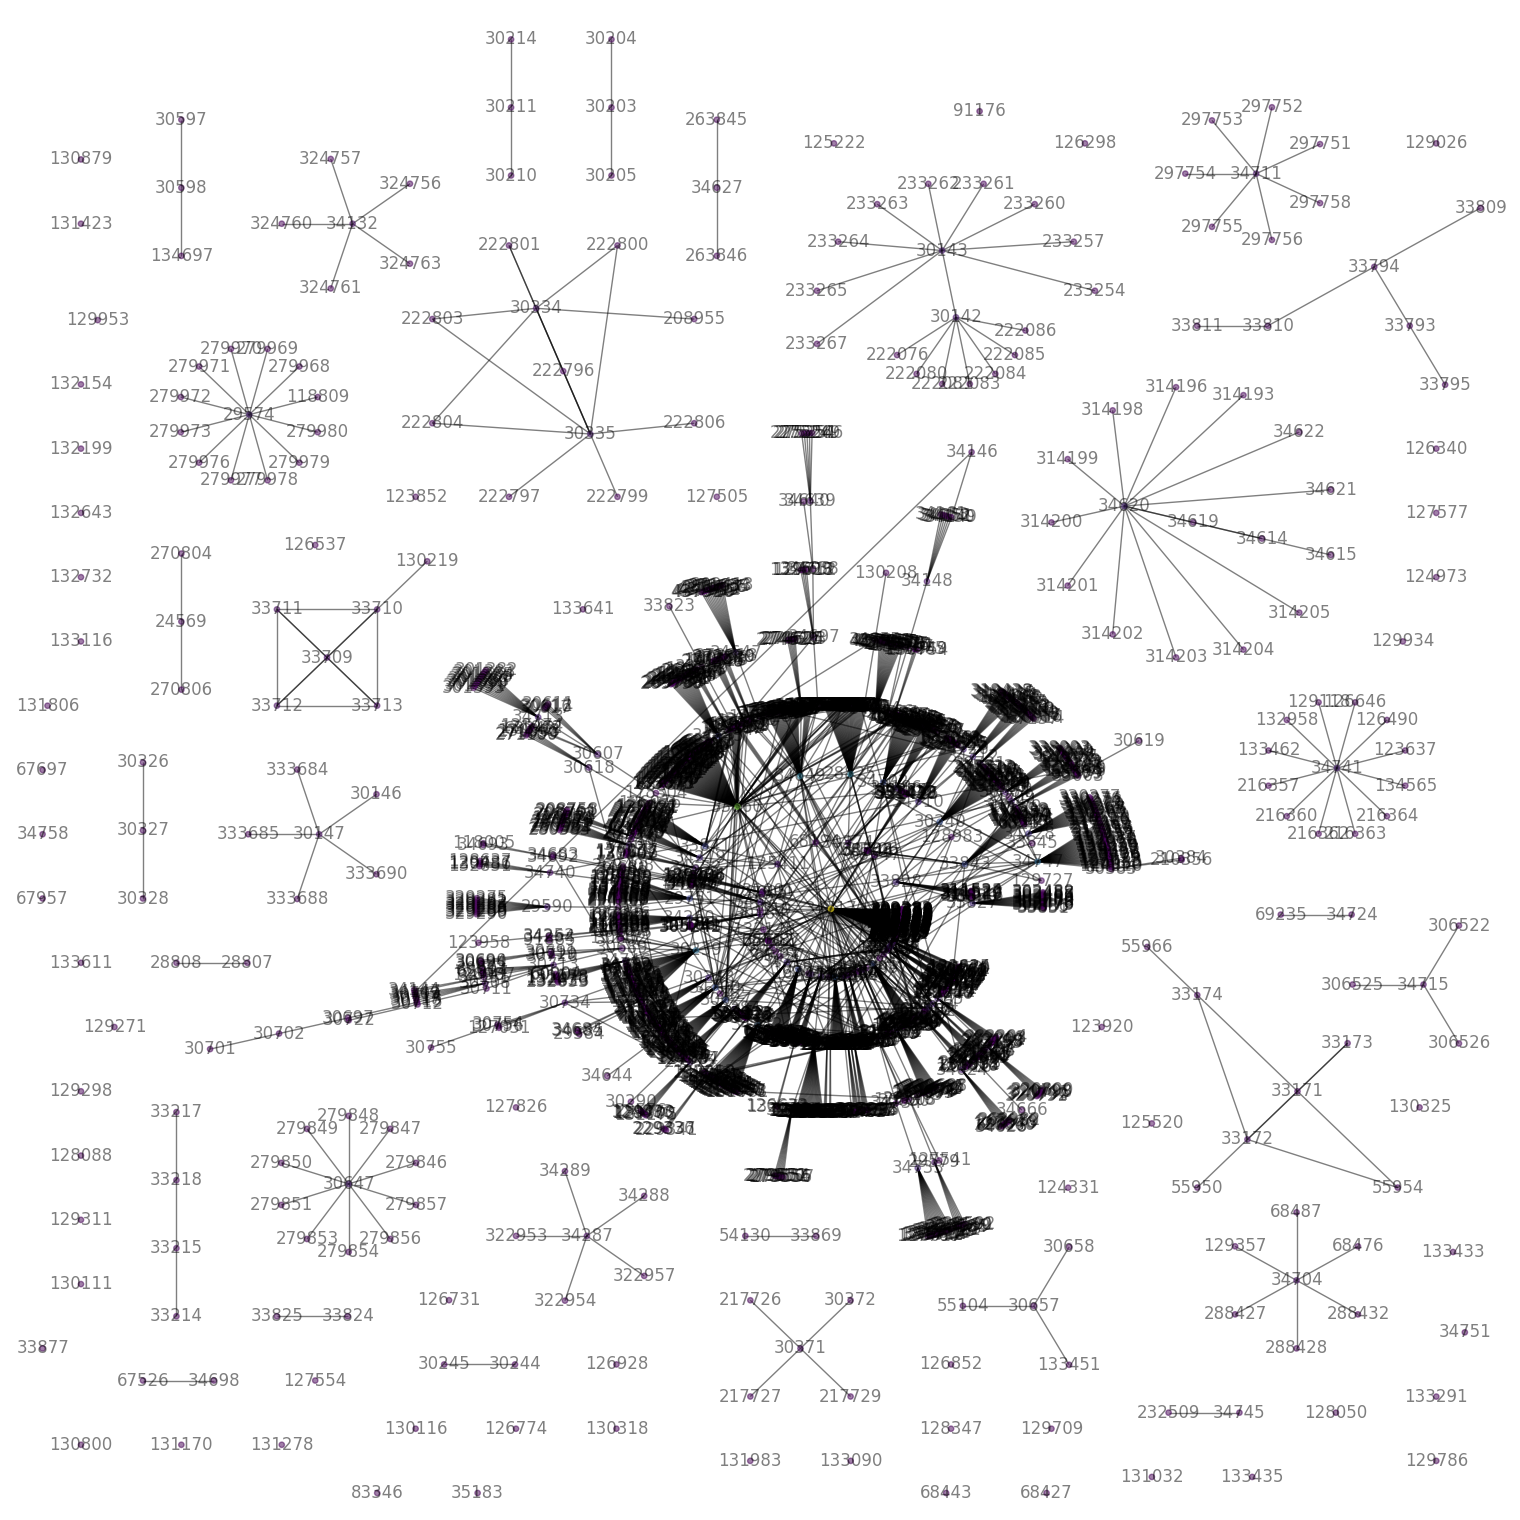

In [52]:

plt.figure(figsize=(15, 15))
# use graphviz to find radial layout
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi", root=34717)
# draw nodes, coloring by rtt ping time
options = {"with_labels": True, "alpha": 0.5, "node_size": 15}
nx.draw(G, pos, node_color=[G.degree[v] for v in G], **options)
# adjust the plot limits
xmax = 1.02 * max(xx for xx, yy in pos.values())
ymax = 1.02 * max(yy for xx, yy in pos.values())
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()